In [161]:
import numpy as np
import matplotlib.pyplot as plt
import IPython 
from scipy.signal import resample

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})


def change_sampling_rate(audio, old_sr, new_sr):
    #   noramlize the signal
    noramlized_audio = audio / np.max(np.abs(audio))

    # New sampling rate for playback (standard 44100 Hz)
    num_samples = int(len(noramlized_audio) * new_sr / old_sr)

    # Resample the signal to the new sampling rate
    resampled_audio = resample(noramlized_audio, num_samples)
    return resampled_audio

In [162]:
THRESHOLD = 100

Lets create a simple signal by combining different frequencies

In [163]:
#   set the time step and sampling rate
dt = 0.001
sampling_rate = 1/dt    #   1000 Hertz

#   generate time array
t = np.arange(0,1,dt)

#   create frequencies
f1 = np.sin(2*np.pi*50*t)
f2 = np.sin(2*np.pi*120*t)
f3 = 0.75*np.sin(2*np.pi*200*t+15)      #   quieter frequency
f4 = 1.25*np.sin(2*np.pi*400*t)         #   louder frequency

#   add frequencies together to create a stationary signal
fs = f1 + f2 + f3 + f4

#   add frequencies together to create a non stationary signal
f3[:600] = 0
f4[300:] = 0
fns = f1 + f2 + f3 + f4     

Lets listen to the stationary signal

In [164]:
resampled_fs = change_sampling_rate(fs, sampling_rate, 44100)
IPython.display.Audio(data=resampled_fs, rate=44100)

Lets listen to the non stationary signal

In [165]:
resampled_fns = change_sampling_rate(fns, sampling_rate, 44100)
IPython.display.Audio(data=resampled_fns, rate=44100)

Lets add some white noise to our signals

In [166]:
#   save clean signals
fs_clean = fs
fns_clean = fns

#   add noise to clean signals
white_noise = 2.5*np.random.randn(len(t))
fs = fs + white_noise
fns = fns + white_noise

#   calculate the difference between two signals
diff = fns - fs

Let's plot what we have

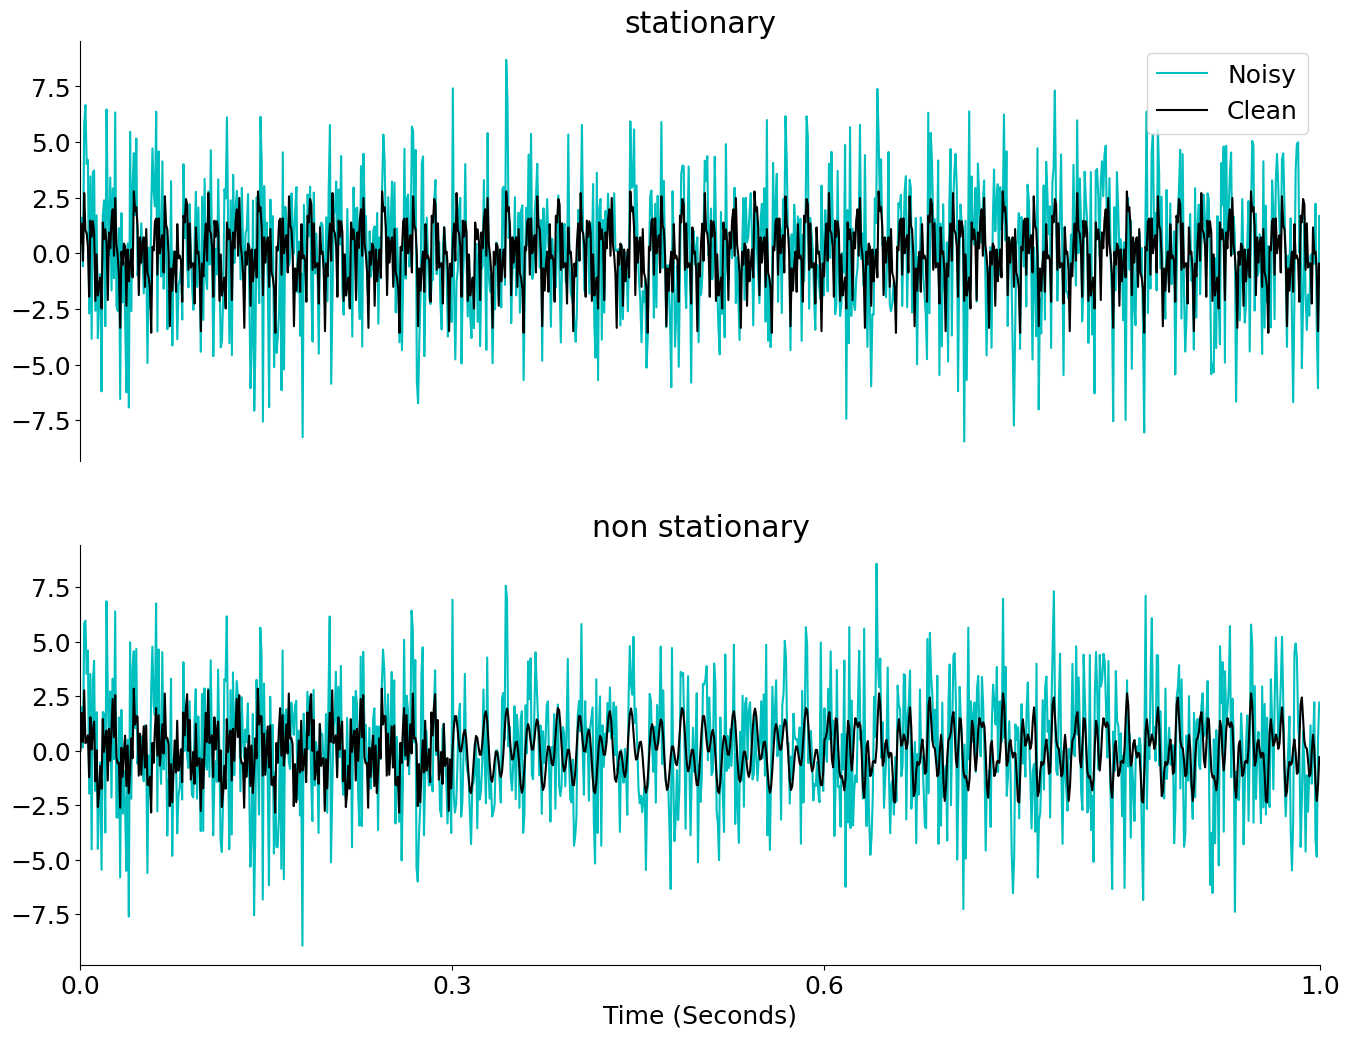

In [167]:
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.title("stationary")
plt.plot(t,fs, color='c', label="Noisy")
plt.plot(t,fs_clean, color='k', label='Clean')
plt.xlim(t[0], t[-1])
axs[0].set_xticks([])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)

plt.legend()

plt.sca(axs[1])
plt.title("non stationary")
plt.plot(t,fns, color='c', label="Noisy")
plt.plot(t,fns_clean, color='k', label='Clean')
plt.xlim(t[0], t[-1])
axs[1].set_xticks([0, 0.3, 0.6, 1])
axs[1].set_xlabel("Time (Seconds)")
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.show()

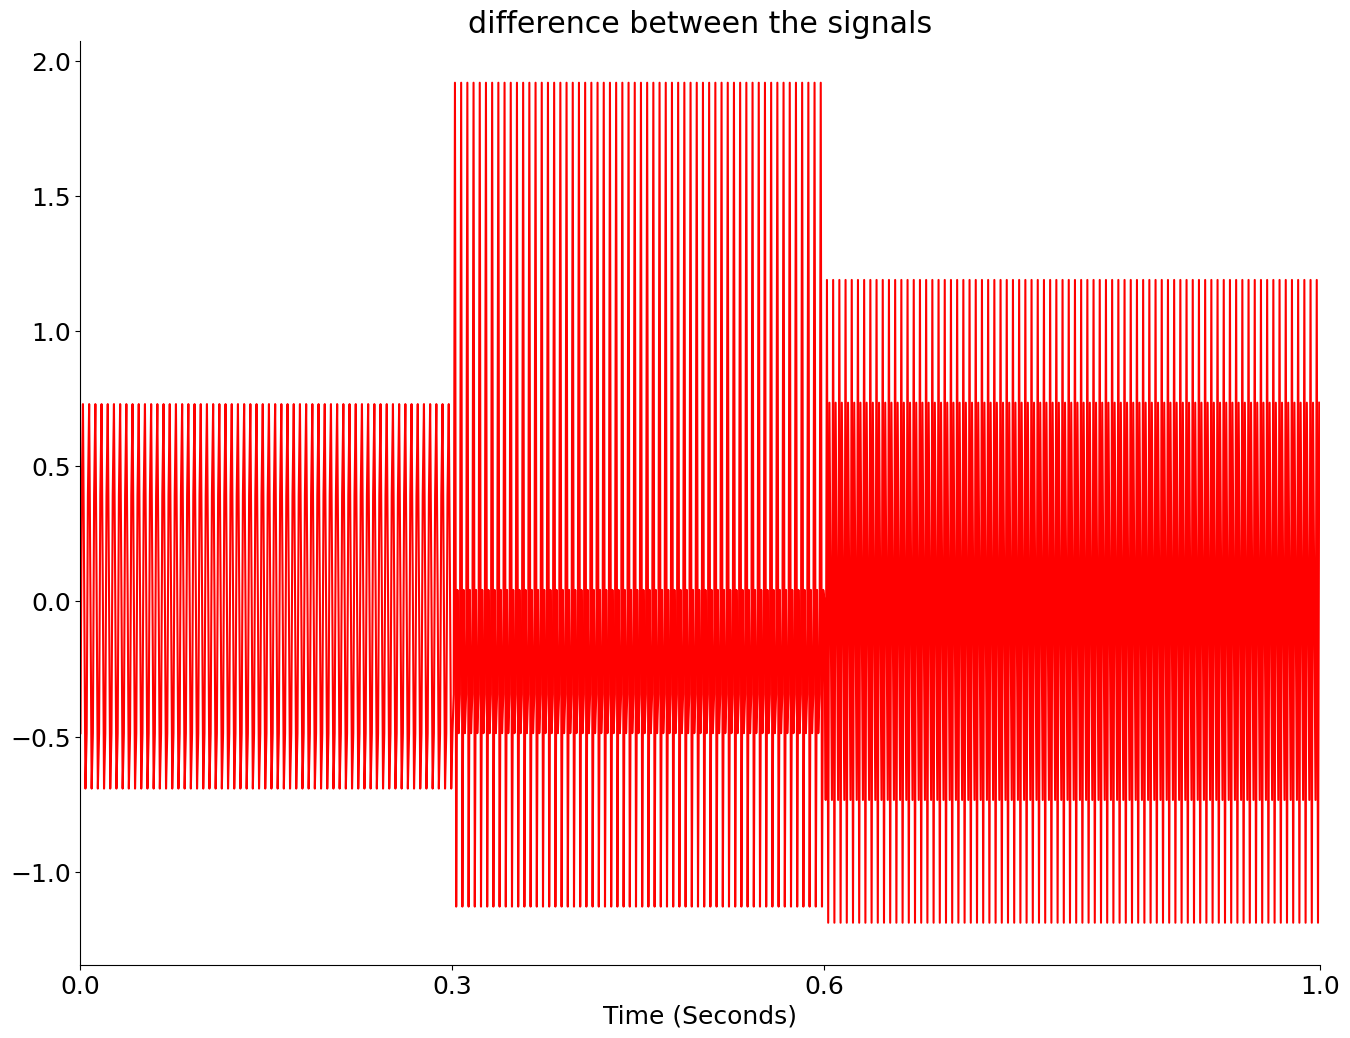

In [168]:

fig,axs = plt.subplots()
plt.title("difference between the signals")
plt.plot(t,diff, color='r')
plt.xlim(t[0], t[-1])
axs.set_xticks([0, 0.3, 0.6, 1])
axs.set_xlabel("Time (Seconds)")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.show()

Lets play around with the Stationary signal:

We will compute the FFT and plot the frequencies found

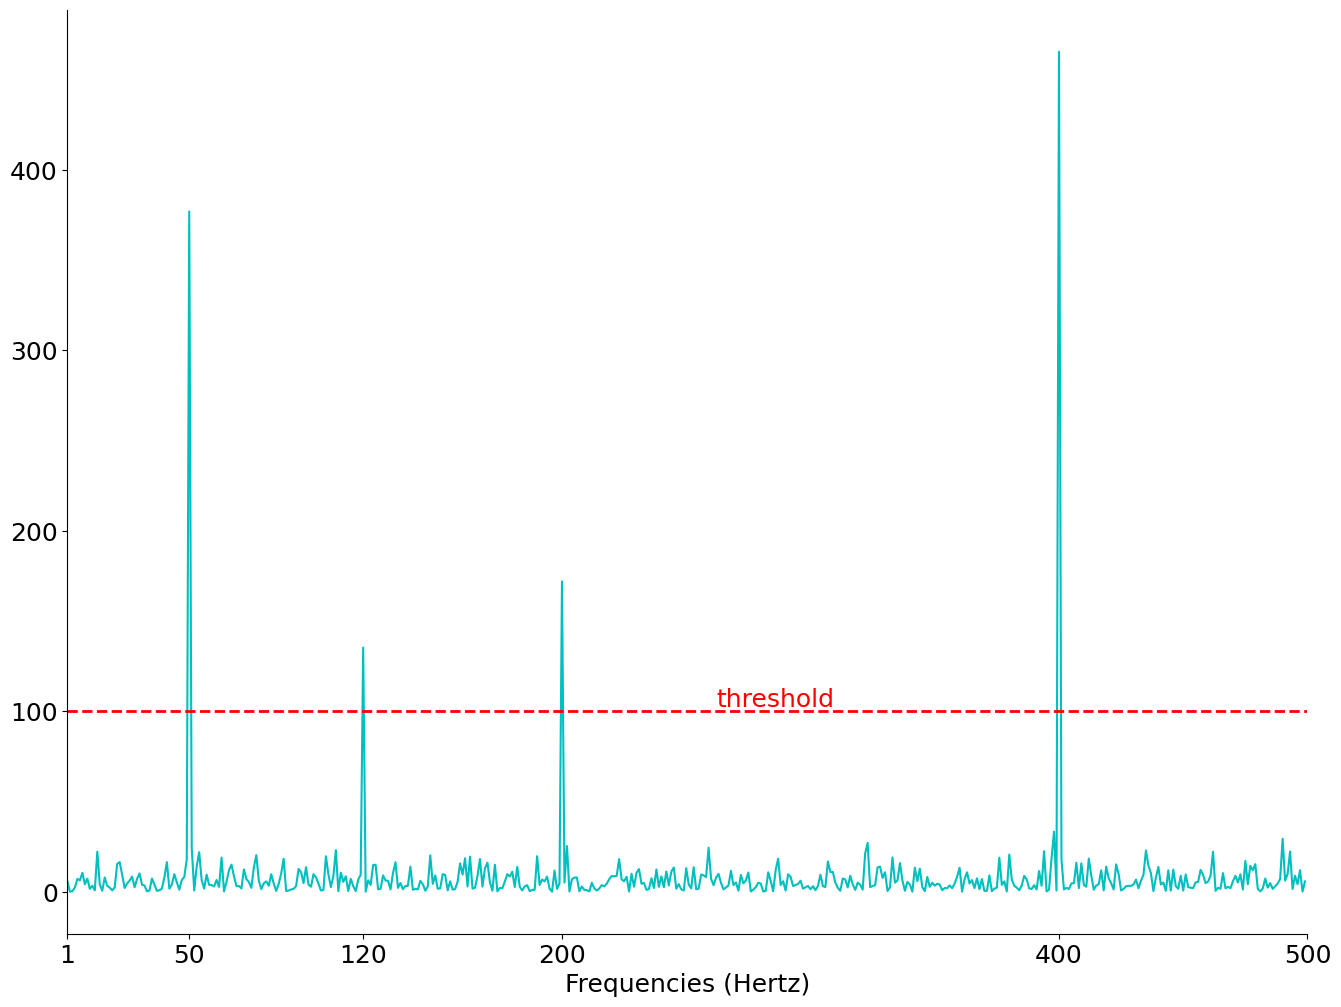

In [169]:
n = len(t)
fs_hat = np.fft.fft(fs,n)                               #   compute fft
PSD_s = fs_hat * np.conj(fs_hat) / n                    #   power spectrum density
freq = (1/(dt*n)) * np.arange(n)                        #   create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype='int')            #   plot only first half


fig,axs = plt.subplots()
plt.plot(freq[L], np.real(PSD_s[L]), color='c')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.axhline(y=THRESHOLD, color='r', linestyle='--', linewidth=2)
plt.text(x=(freq[L[-1]]+1)/1.75, y=THRESHOLD, s="threshold", color="r", ha='center', va='bottom')

axs.set_xticks([freq[L[0]], 50, 120, 200, 400, freq[L[-1]]+1])
axs.set_xlabel("Frequencies (Hertz)")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.show()

We can see that the original frequencies that constructed the signal are shown on the graph and pass the threshold


Lets compute the Inverse FFT and reconstruct the original signal

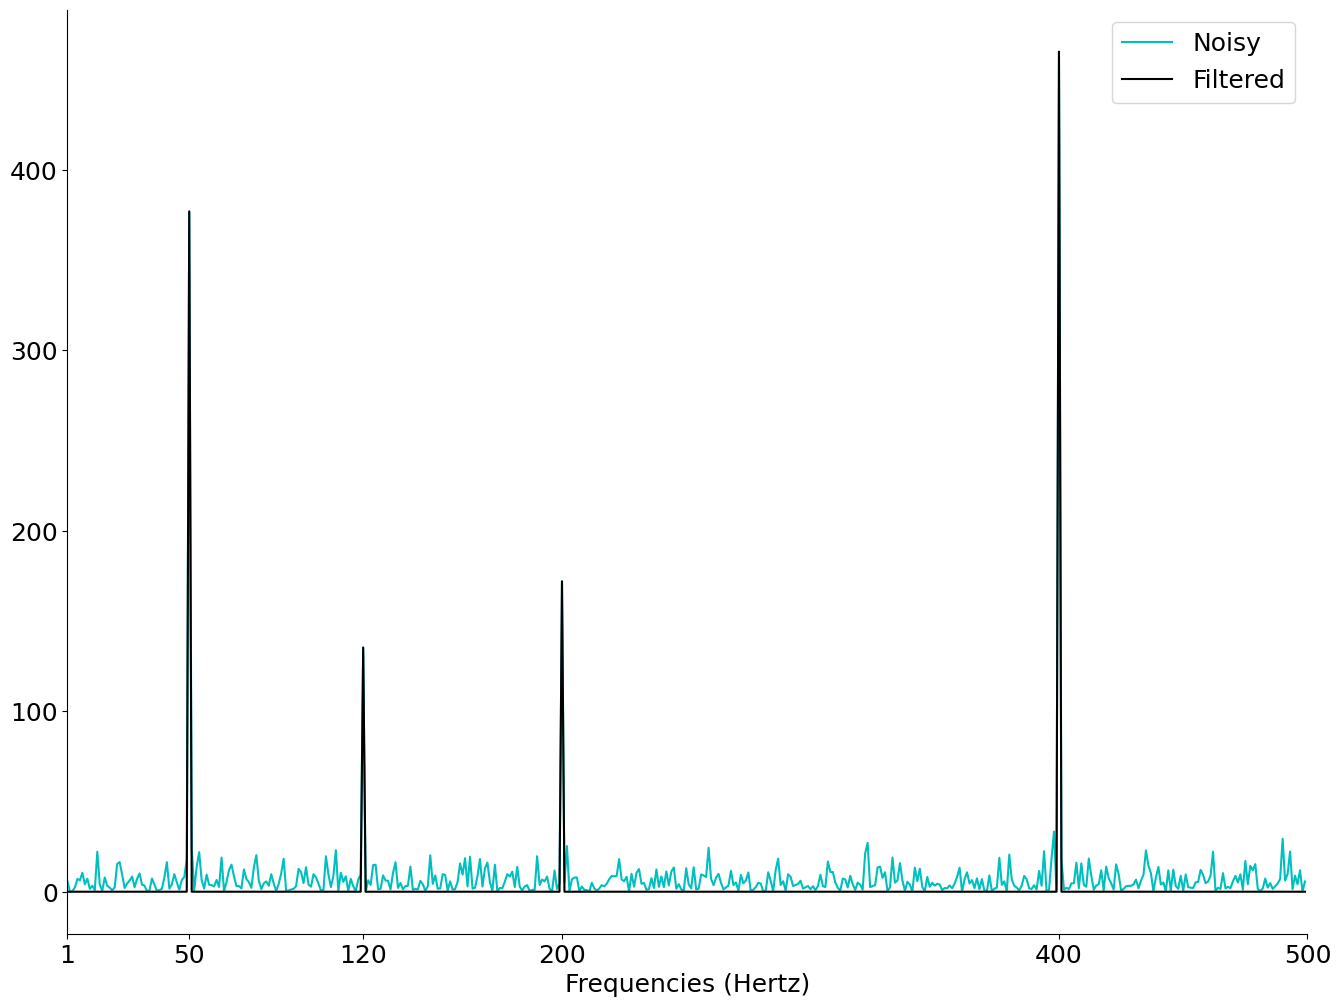

In [170]:
#   take only the frequencies that pass the threshold
indexes = PSD_s > THRESHOLD
PSD_s_clean = PSD_s * indexes
fs_hat = indexes * fs_hat
fs_filt = np.real(np.fft.ifft(fs_hat))

fig,axs = plt.subplots()
plt.plot(freq[L], np.real(PSD_s[L]), color='c', label="Noisy")
plt.plot(freq[L], np.real(PSD_s_clean[L]), color='k', label="Filtered")
plt.xlim(freq[L[0]], freq[L[-1]])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_xlabel("Frequencies (Hertz)")
axs.set_xticks([freq[L[0]], 50, 120, 200, 400, freq[L[-1]]+1])


plt.legend()  
plt.show()

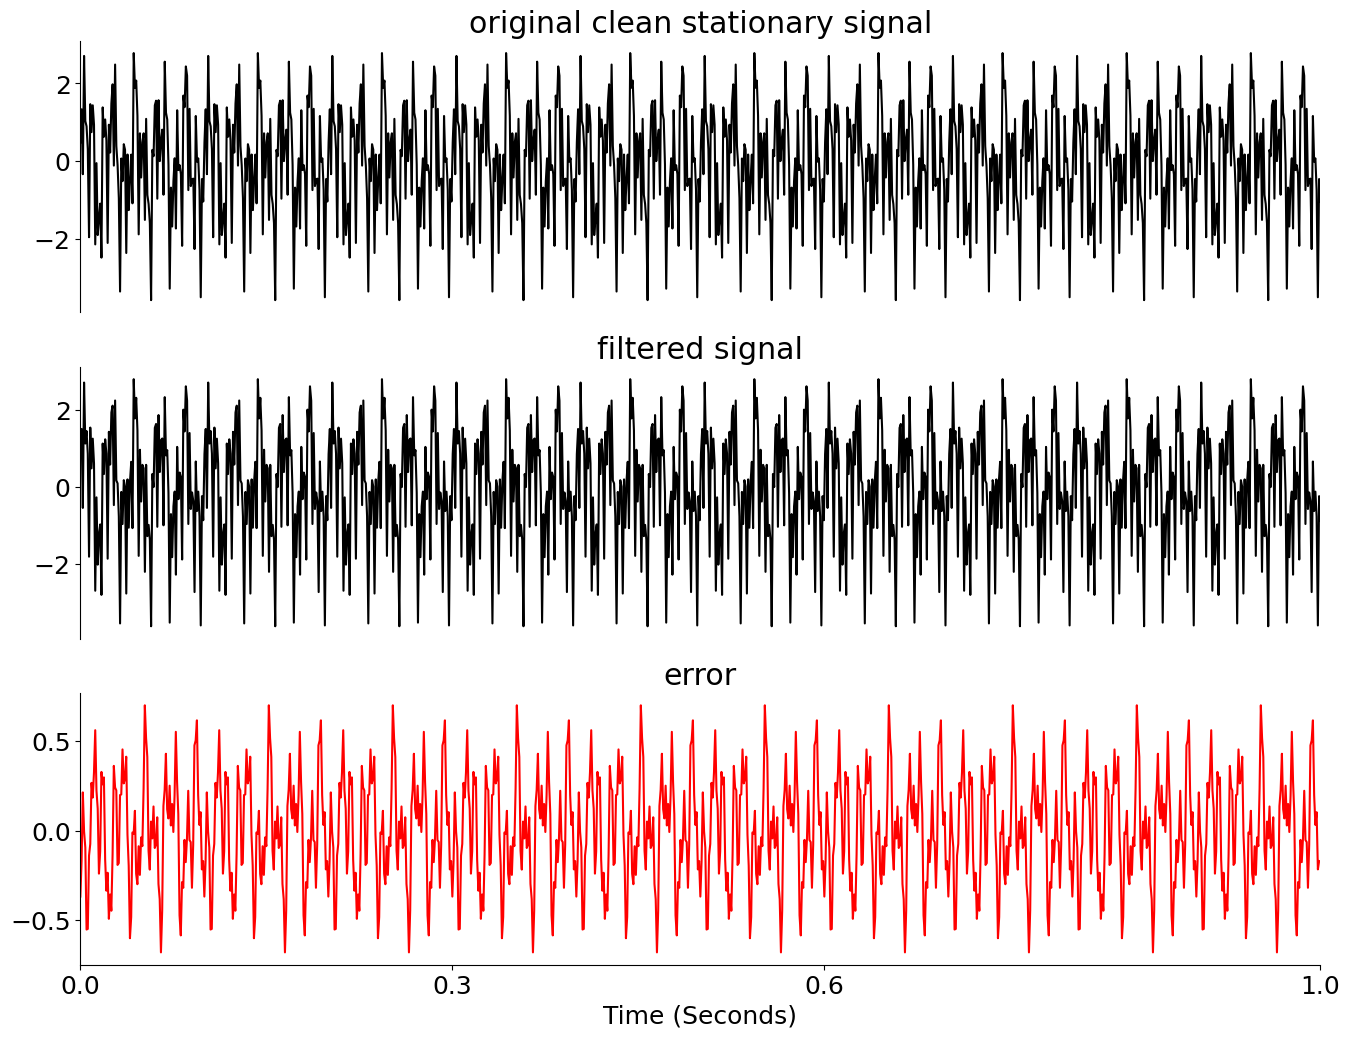

In [171]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])

plt.title("original clean stationary signal")
plt.plot(t,fs_clean, color='k')
plt.xlim(t[0], t[-1])
axs[0].set_xticks([])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)



plt.sca(axs[1])

plt.title("filtered signal")
plt.plot(t,fs_filt, color='k')
plt.xlim(t[0], t[-1])
axs[1].set_xticks([])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)


diff_s = fs_clean - fs_filt

plt.sca(axs[2])
plt.title("error")
plt.plot(t,diff_s, color='r')
plt.xlim(t[0], t[-1])
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xticks([0, 0.3, 0.6, 1])
axs[2].set_xlabel("Time (Seconds)")

plt.show()

Lets listen to the original clean stationary signal

In [172]:
resampled_clean_fs = change_sampling_rate(fs_clean, sampling_rate, 44100)
IPython.display.Audio(data=resampled_clean_fs, rate=44100)


Lets listen for the filtered signal we reconstructed

In [173]:
resampled_filtered_fs = change_sampling_rate(fs_filt, sampling_rate, 44100)
IPython.display.Audio(data=resampled_filtered_fs, rate=44100)


Looks good. Sounds good.

BUT WHAT IF THE SIGNAL IS NON STATIONARY ?

Lets try to do the same with the non stationary signal

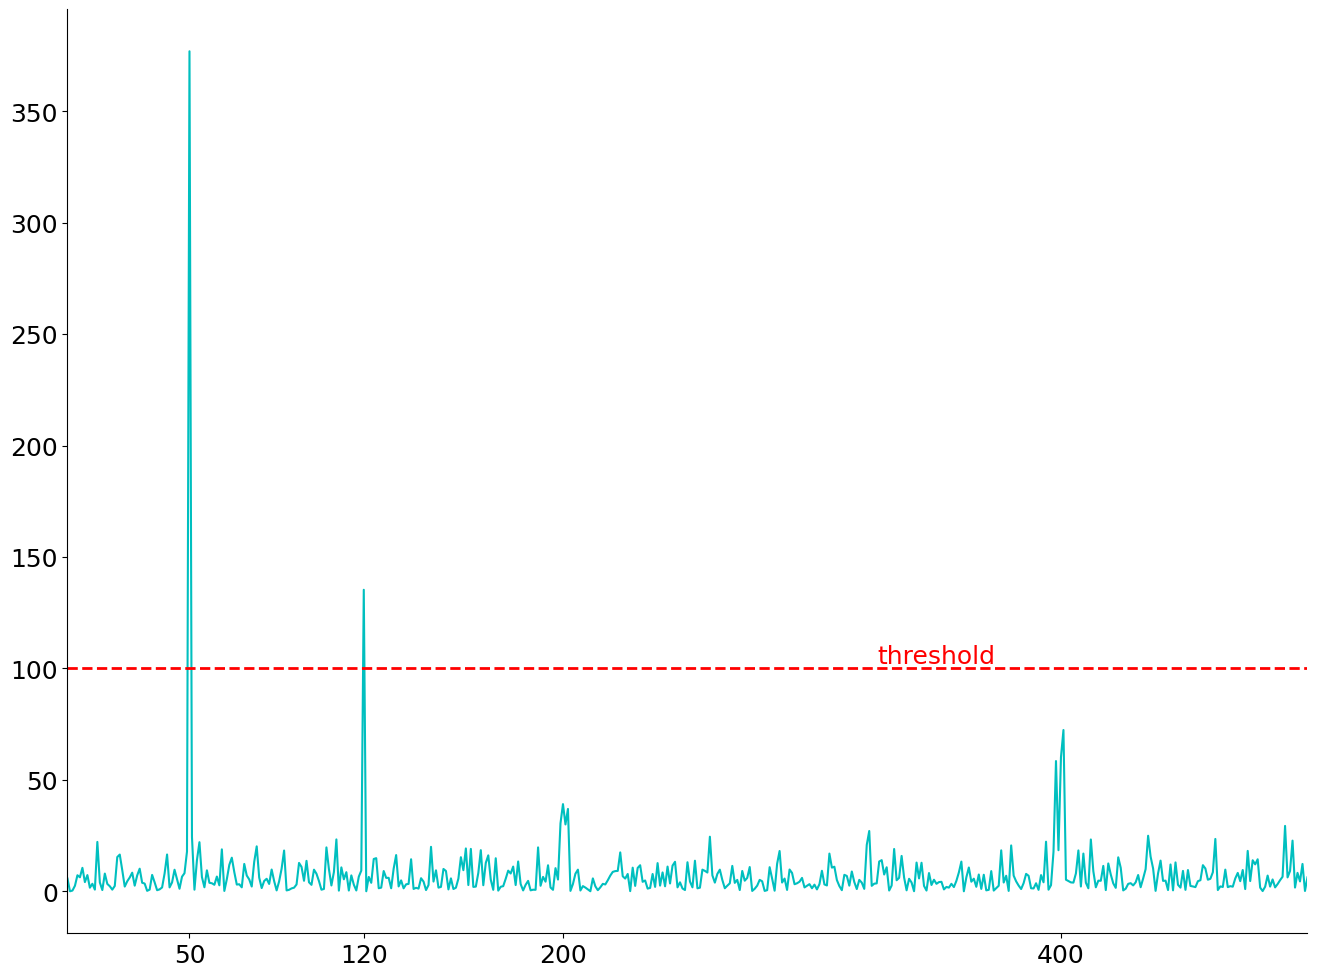

In [174]:
n = len(t)
fns_hat = np.fft.fft(fns,n)                         #   compute fft
PSD_ns = fns_hat * np.conj(fns_hat)/n               #   power spectrum density
freq = (1/(dt*n)) * np.arange(n)                    #   create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype='int')        #   plot only first half


fig,axs = plt.subplots()
plt.plot(freq[L], np.real(PSD_ns[L]), color='c', label="Noisy")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.axhline(y=100, color='r', linestyle='--', linewidth=2)
plt.text(x=350, y=100, s="threshold", color="r", ha='center', va='bottom')
axs.set_xticks([50, 120, 200, 400])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.show()

We see some of the frequencies don't pass the threshold.
We can lower the threshold but we take a chance at catching noise frequencies.

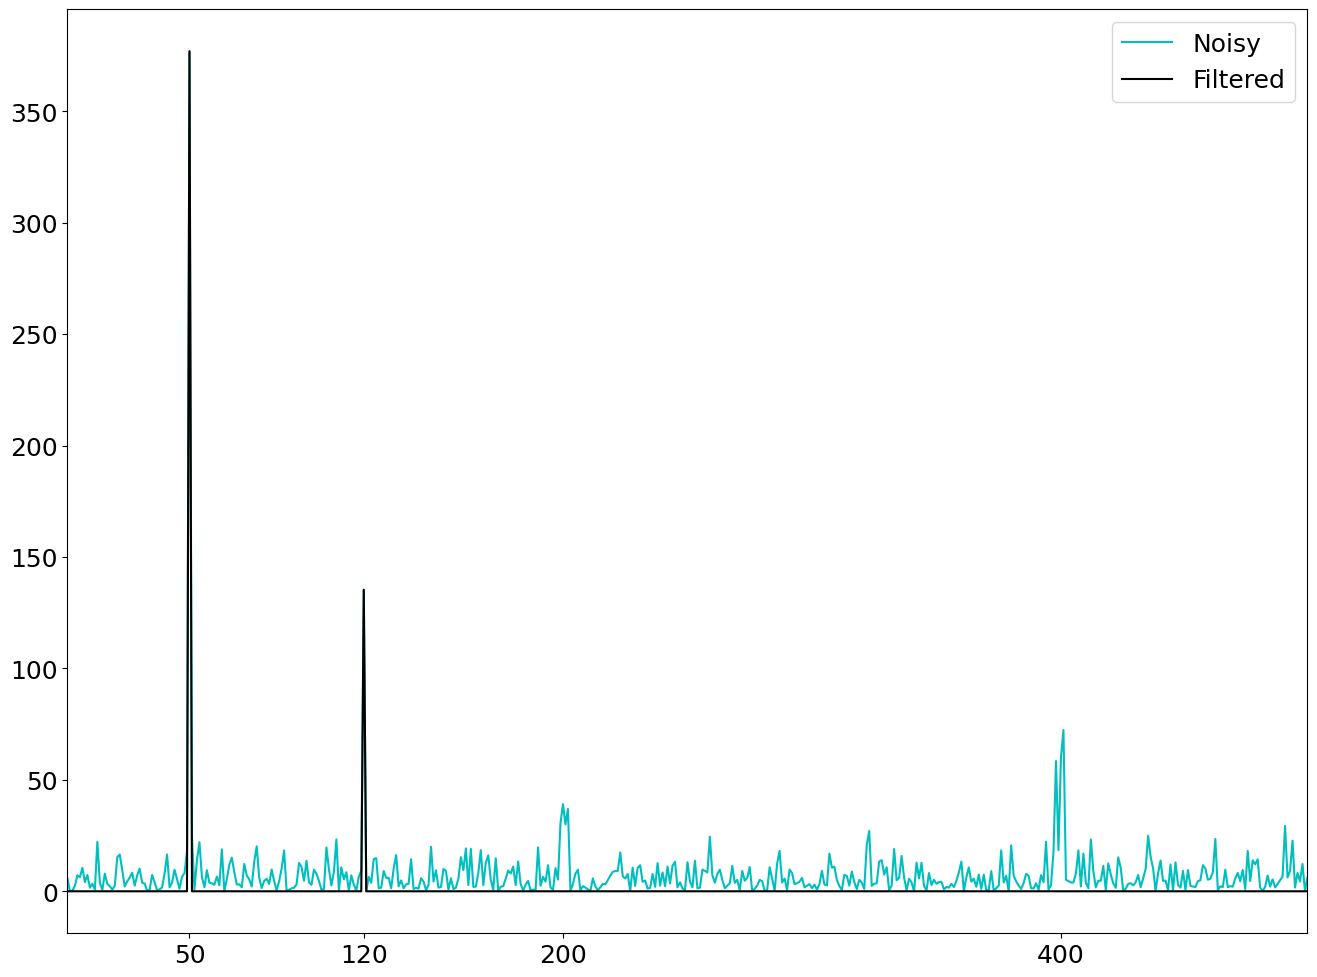

In [175]:
indexes = PSD_ns > 100
PSD_ns_clean = PSD_ns * indexes
fns_hat = indexes * fns_hat
fns_filt = np.real(np.fft.ifft(fns_hat))

fig,axs = plt.subplots()
plt.plot(freq[L], PSD_ns[L], color='c', label="Noisy")
plt.plot(freq[L], np.real(PSD_ns_clean[L]), color='k', label="Filtered")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
axs.set_xticks([50, 120, 200, 400])

plt.show()

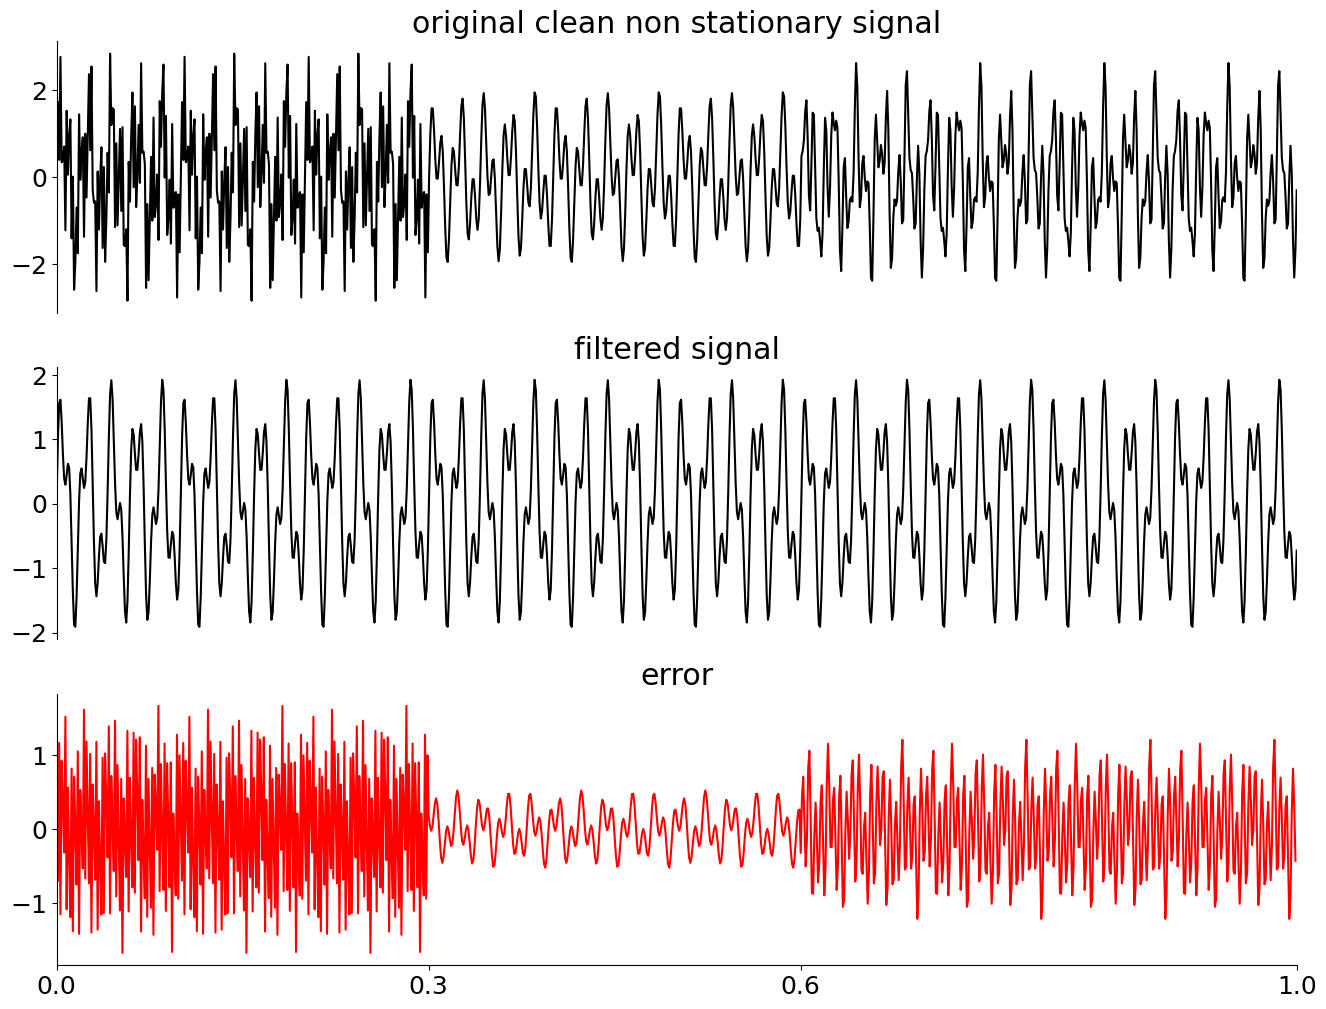

In [176]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.title("original clean non stationary signal")
plt.plot(t, fns_clean, color='k')
plt.xlim(t[0], t[-1])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].set_xticks([])


plt.sca(axs[1])
plt.title("filtered signal")
plt.plot(t,fns_filt, color='k')
plt.xlim(t[0], t[-1])
axs[1].set_xticks([])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)

diff_ns = fns_filt - fns_clean

plt.sca(axs[2])
plt.title("error")
plt.plot(t,diff_ns, color='r')
plt.xlim(t[0], t[-1])
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xticks([0, 0.3, 0.6, 1])


plt.show()

As seen above, we get more errors with a non stationary signal.

Lets listen to the original clean non stationary signal

In [177]:
resampled_clean_fns = change_sampling_rate(fns_clean, sampling_rate, 44100)
IPython.display.Audio(data=resampled_clean_fns, rate=44100)


In [178]:
resampled_filtered_fns = change_sampling_rate(fns_filt, sampling_rate, 44100)
IPython.display.Audio(data=resampled_filtered_fns, rate=44100)

In conclusion, we see that noise removal of a non stationary signal using FFT is not simple.
It's a challenge to find all the frequencies that construct the signal.

Also, FFT doesn't provide enough timing information, even if the frequencies are known - when are they generated ? when are they stopped ?

In order to get more info on the signal , we need to use the STFT algorithm.
